Data source:

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

  Available at: [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Brief inspection of the data:

In [7]:
bank_data = pd.read_csv("bank-additional-full.csv", sep=';')
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


No missing data:

In [8]:
# see the type of each attribute + how many observations in each

bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

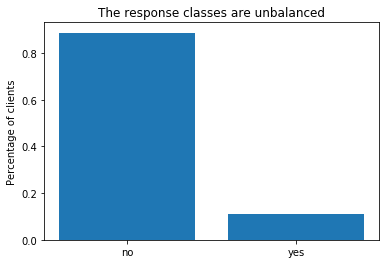

In [9]:
num_no = len(bank_data.loc[bank_data['y']=='no','y']) / len(bank_data['y'])
num_yes = len(bank_data.loc[bank_data['y']=='yes','y']) / len(bank_data['y'])

plt.bar(['no', 'yes'], [num_no, num_yes]);
plt.title('The response classes are unbalanced');
plt.ylabel('Percentage of clients');

In [10]:
# quick overview of numerical attributes

bank_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Numerical attributes:
- 'campaign', 'duration' and 'previous' are all right skewed. In other words, the majority of customers were contacted few times (<3), for approximately 2-3 minutes in the final call and had not been contacted in a previous campaign.
- 'pdays' and 'previous' don't appear to take on many distinct values.
- 'pdays' values of 999 need to be corrected for somehow.

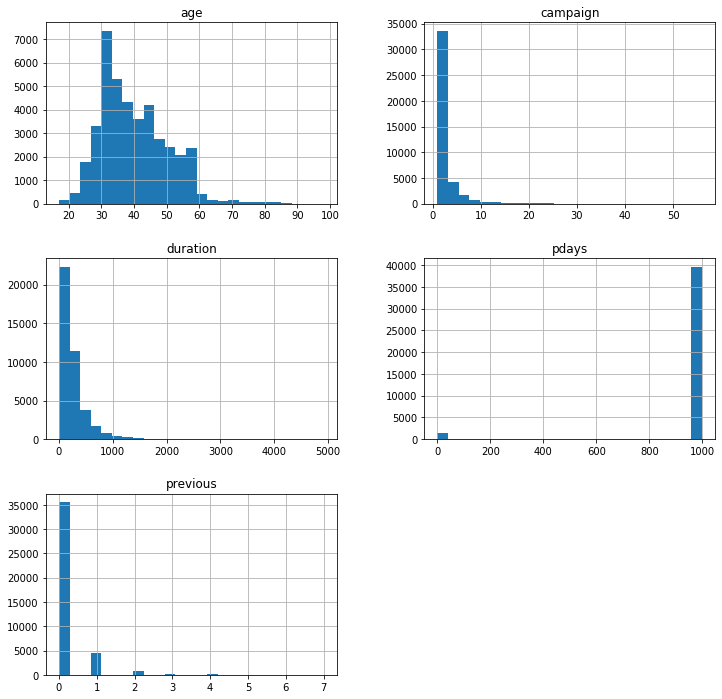

In [11]:
# histograms of numerical attributes

bank_data[['age', 'duration', 'campaign', 'pdays', 'previous']].hist(bins=25, figsize=(12,12));

Categorical attributes:
- The 'unknown' category shows that there is missing data.
- There are some sparse classes, e.g. 'unknown' for marital, housing, loan + 'illiterate' for education + some months in year + 'yes' for default

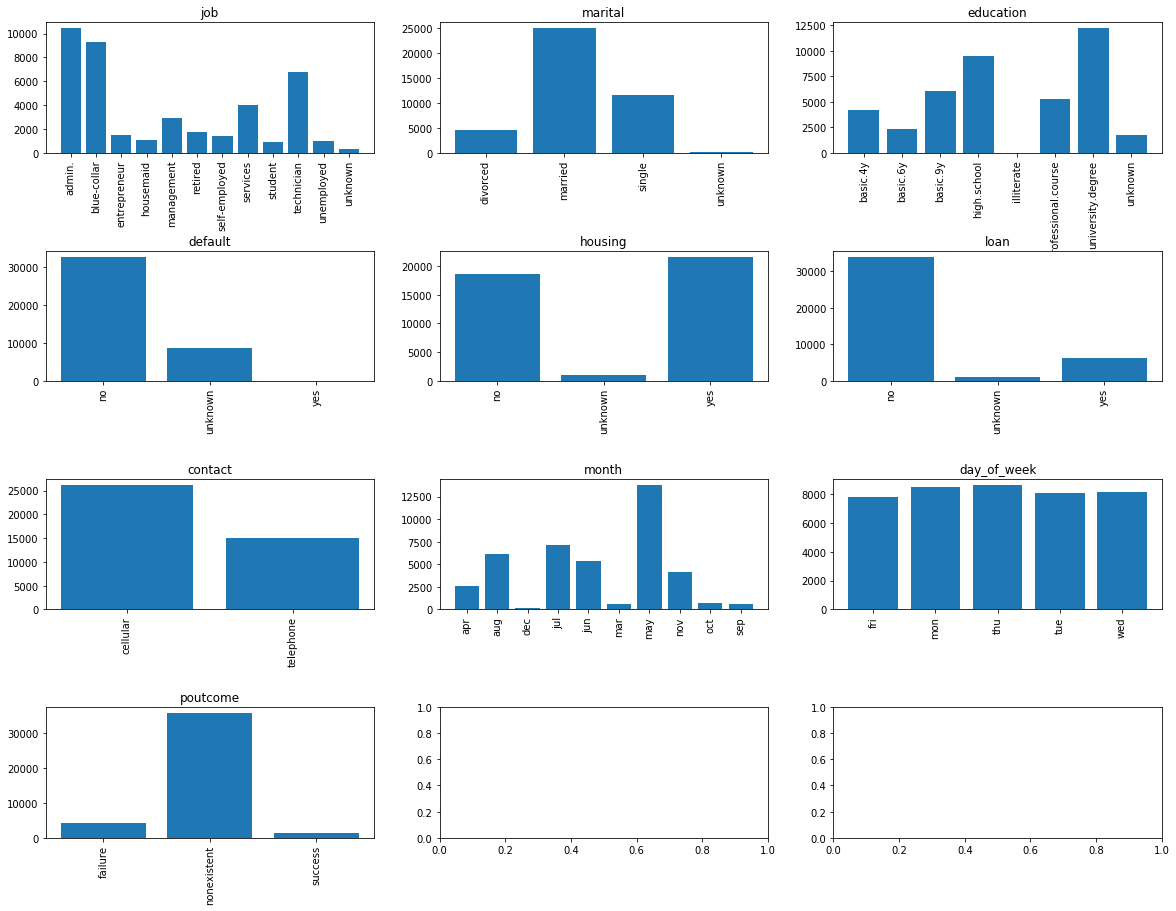

In [12]:
categorical_attribs = list(bank_data.columns[[type(bank_data[column][1])==str for column in bank_data.columns]])

fig, ax = plt.subplots(4, 3, figsize=(20,15));
fig.subplots_adjust(hspace=0.75, wspace=0.2);

for attrib in bank_data[categorical_attribs[:-1]]:
    i = categorical_attribs.index(attrib)
    counts = bank_data[attrib].value_counts().sort_index()
    ax[int(i / 3), i - 3*int(i/3)].bar(counts.index, counts)
    for tick in ax[int(i / 3), i - 3*int(i/3)].get_xticklabels():
        tick.set_rotation(90)
    ax[int(i / 3), i - 3*int(i/3)].set_title(attrib)

### Create a test set now (to avoid data snooping bias)

In [13]:
# This data set is large enough to not use stratified sampling (although some of the sparse classes may not be
# represented in the test set but will fix with feature engineering later)

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(bank_data, test_size = 0.2, random_state = 0)

### Explore the data:

In [14]:
numerical_attribs = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                     'euribor3m', 'nr.employed', 'y']
numerical_data = train_set[numerical_attribs].copy()
numerical_data.loc[numerical_data['pdays']==999, 'pdays'] = 0 

numerical_data.loc[numerical_data['y']=='yes', 'y'] = 1
numerical_data.loc[numerical_data['y']=='no', 'y'] = 0

individual_numeric = numerical_data[['age', 'duration', 'campaign', 'previous', 'pdays']]
market_numeric = numerical_data[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]

Per the below box plots:
- duration is clearly related to the response but we can't use this attribute as outlined in the specs
- it is unclear from this display of the data how the other individual client data is related to the response
- the broader market indicators appear to be related to the response
- it appears that median euribor3m, consumer price index and employment are all lower at the time when people sign up for term deposits. However, this data is from 2008-2010 which includes the global financial crisis and aftermath. At this time, stock markets were crashing and the future of the economy was uncertain. Hence, a lot of people were seeking safety for their money in term deposits. The relationship (and direction of the relationship) between the 3 mentioned variables and the response may be specific to this period and may not generalise well to other periods. Perhaps all 3 variables should be combined into some kind of 'economic conditions' categorical variable
- nr.employed is related to the response but I don't know what this attribute represents

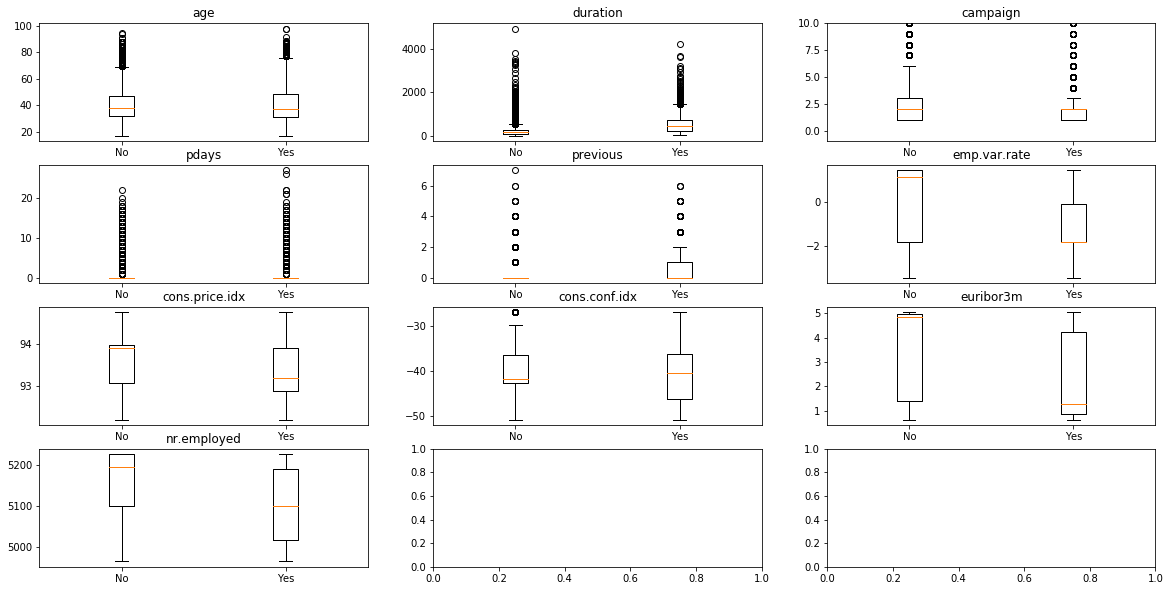

In [15]:
fig, ax = plt.subplots(4, 3, figsize=(20,10));
fig.subplots_adjust(hspace=0.2, wspace=0.2);

for i, attrib in enumerate(numerical_attribs[:-1]):
    no = numerical_data.loc[numerical_data['y']==0, attrib]
    yes = numerical_data.loc[numerical_data['y']==1, attrib]
    ax[int(i/3), i - 3*int(i/3)].boxplot([no, yes]);
    ax[int(i/3), i - 3*int(i/3)].set(title=attrib, xticklabels=['No', 'Yes']);

ax[0,2].set_ylim(-1,10);

The below charts, which show the % of clients who signed up for a term deposit versus each individual numerical attribute, give a much clearer picture. The horizontal red dotted line is the % of all clients in the training set who signed up for the term deposit.

- the data is bumpy but in general, younger clients (<25) and older clients (>60) appear far more likely to sign up for a term deposit
- campaign may be negatively related to the chance of signing up to a term deposit (people who signed up were called less times during this campaign on average)
- the chance of signing up to a TD is higher for a higher number of contacts on the previous campaign up until 3 contacts. Then it remains flat until 6 previous contacts and strangely crashes for 7 previous contacts (maybe this is a very sparse class affected by a few outliers)
- it is difficult to say how pdays is related to the chance of signing up for a TD. The chance is relatively high for any value of pdays > 0 but this just means the client previously signed up for a TD which is likely related to whether they signed up again.

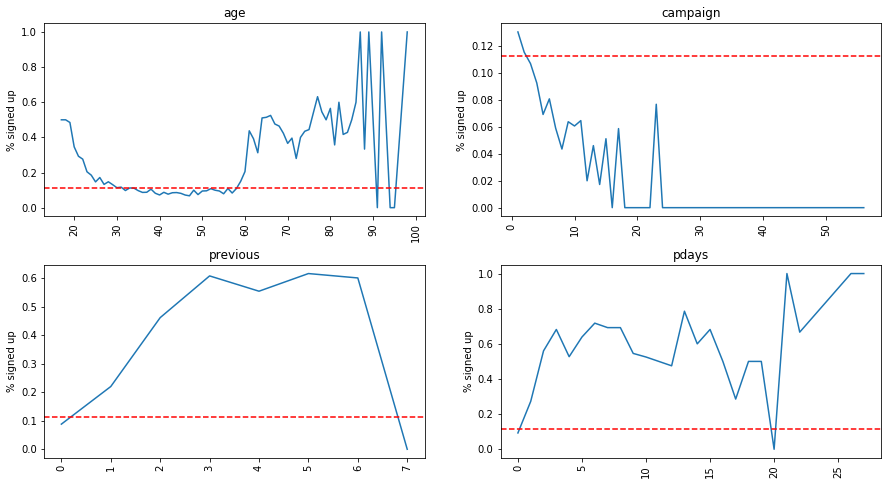

In [16]:
pct_yes = sum(train_set['y']=='yes')/len(train_set['y'])

fig, ax = plt.subplots(2, 2, figsize=(15,8));
fig.subplots_adjust(hspace=0.25, wspace=0.2);

for i, attrib in enumerate(['age', 'campaign', 'previous', 'pdays']):
    yes_no = pd.crosstab(index=numerical_data[attrib], columns=numerical_data['y'], values='y', 
                     aggfunc='count', normalize='index')

    ax[int(i/2), i - 2*int(i/2)].plot(yes_no.index, yes_no[1])
    ax[int(i/2), i - 2*int(i/2)].axhline(y=pct_yes, color='red', ls='--')
    for tick in ax[int(i/2), i - 2*int(i/2)].get_xticklabels():
        tick.set_rotation(90)
    ax[int(i/2), i - 2*int(i/2)].set(title=attrib, ylabel='% signed up')

Multicollinearity does not appear to be a problem for the individual numerical attributes (campaign and duration are related but duration cannot be used in the analysis). Multicollinearity is less of an issue in prediction tasks (which this is) than inference tasks anyway.

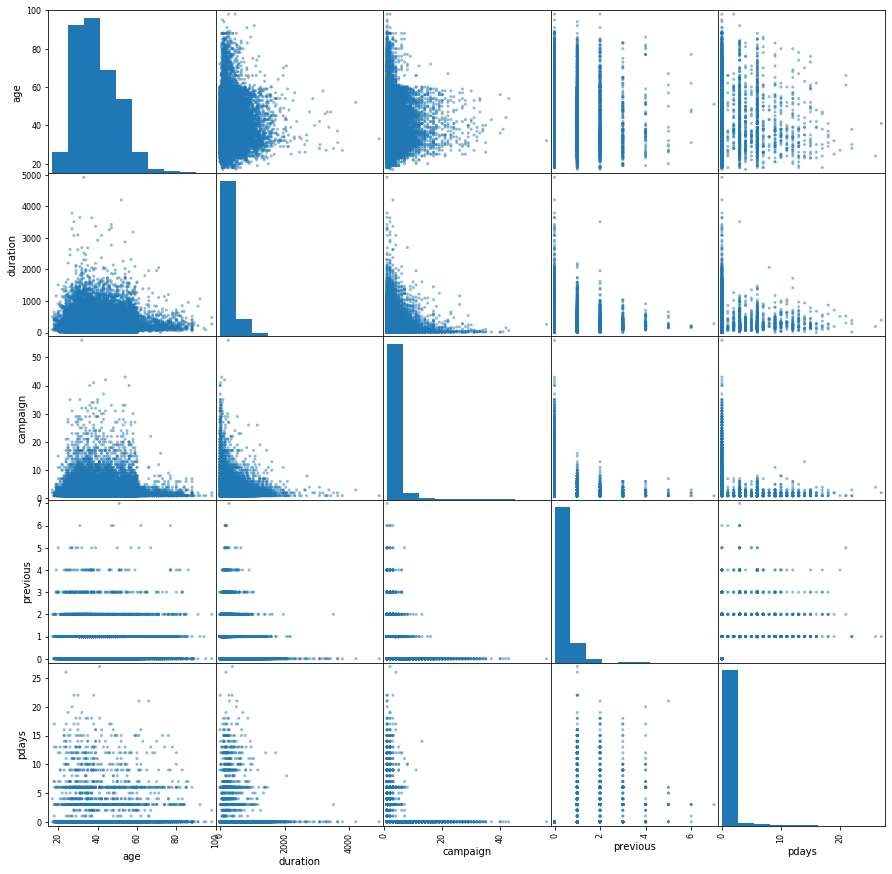

In [17]:
from pandas.plotting import scatter_matrix

# plot numerical attributes relating to individuals
scatter_matrix(individual_numeric, figsize=(15,15));

In [18]:
individual_numeric.corr()

,age,duration,campaign,previous,pdays
age,1.000000,-0.000627,0.003993,0.023667,0.020301
duration,-0.000627,1.000000,-0.069326,0.019444,0.042122
campaign,0.003993,-0.069326,1.000000,-0.079076,-0.043329
previous,0.023667,0.019444,-0.079076,1.000000,0.486294
pdays,0.020301,0.042122,-0.043329,0.486294,1.000000


For the market attributes; Euribor3m, emp.var.rate and cons.price.index are all highly correlated with each other. This data is from a very specific period (the GFC and aftermath) so it is unclear how results from using these variables will generalise to other time periods. As discussed, I will combine these 3 attributes into a broader 'economic conditions' attribute

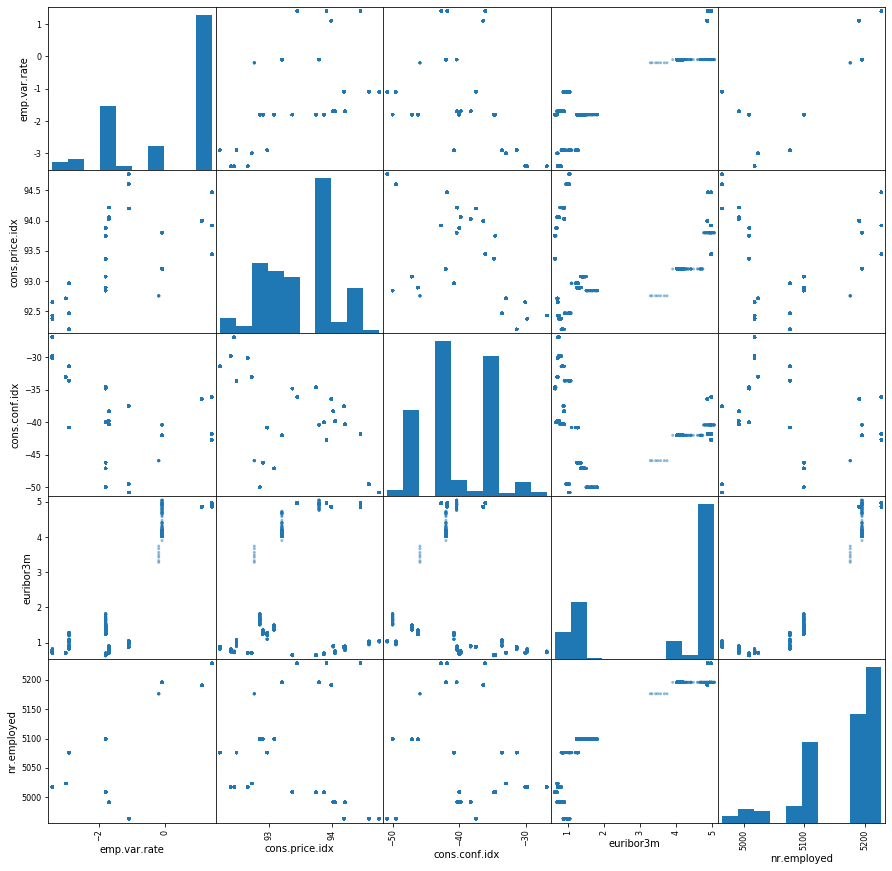

In [19]:
# plot numerical attributes relating to the broader market
scatter_matrix(market_numeric, figsize=(15,15));

In [20]:
market_numeric.corr()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
emp.var.rate,1.000000,0.774772,0.193186,0.972159,0.906623
cons.price.idx,0.774772,1.000000,0.055970,0.687399,0.520501
cons.conf.idx,0.193186,0.055970,1.000000,0.275381,0.099334
euribor3m,0.972159,0.687399,0.275381,1.000000,0.945120
nr.employed,0.906623,0.520501,0.099334,0.945120,1.000000


In [21]:
# quick overview of categorical attributes (including 'previous' as it only has 8 possible values so it's relationship
# with the response is easier to see as a bar chart)

categorical_attribs = list(train_set.columns[[type(bank_data[column][1])==str for column in bank_data.columns]])
categorical_attribs.insert(-1, 'previous')
categorical_data = bank_data[categorical_attribs].copy() # work on a copy

categorical_data['marital'] = pd.Categorical(categorical_data['marital'],
                                             categories=["single", "married", "divorced","unknown"],
                                             ordered=True)
categorical_data['education'] = pd.Categorical(categorical_data['education'],
                                             categories=["illiterate", "basic.4y", "basic.6y","basic.9y",
                                                        "high.school", "professional.course", "university.degree",
                                                        "unknown"],
                                             ordered=True)
categorical_data['month'] = pd.Categorical(categorical_data['month'],
                                             categories=['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
                                             ordered=True)
categorical_data['day_of_week'] = pd.Categorical(categorical_data['day_of_week'], categories=['mon', 'tue', 'wed', 'thu', 'fri'],
                                             ordered=True)
categorical_data['default'] = pd.Categorical(categorical_data['default'], categories=["no", "yes","unknown"], ordered=True)
categorical_data['housing'] = pd.Categorical(categorical_data['housing'], categories=["no", "yes","unknown"], ordered=True)
categorical_data['loan'] = pd.Categorical(categorical_data['loan'], categories=["no", "yes","unknown"], ordered=True)
categorical_data['poutcome'] = pd.Categorical(categorical_data['poutcome'], 
                                              categories=["failure", "success", "nonexistent"], ordered=True)

Per the below charts:
- The horizontal red dotted line is the % of all clients in the training set who signed up for the term deposit
- The strongest indicators of signing up to a term deposit appear to be: being retired or a student, being illiterate, the month being March, September, October, December, having previously signed up for a term deposit, and the number of times the client was previously contacted
- marital, housing, loan, day of week do not seem like useful features

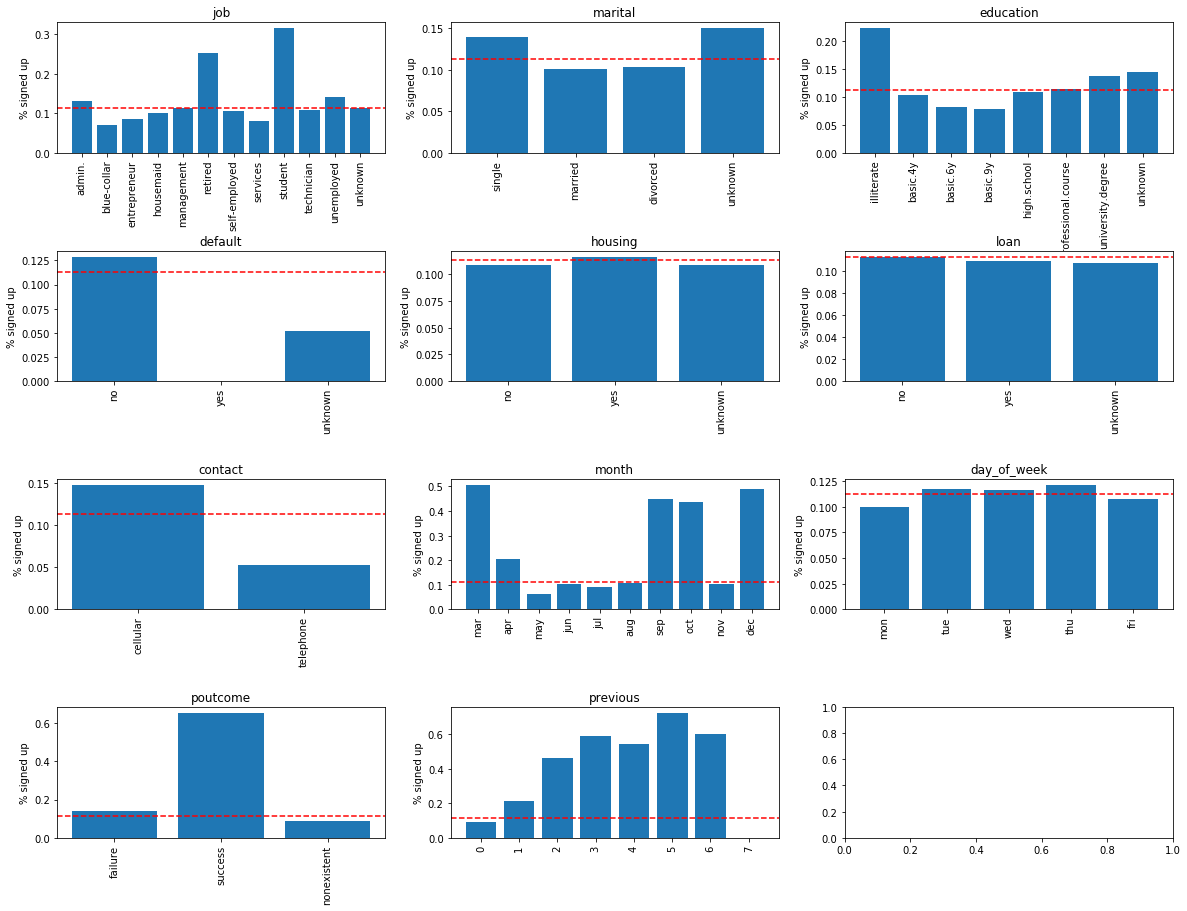

In [22]:
pct_yes = sum(train_set['y']=='yes')/len(train_set['y'])

fig, ax = plt.subplots(4, 3, figsize=(20,15));
fig.subplots_adjust(hspace=0.75, wspace=0.2);

for i, attrib in enumerate(categorical_attribs[:-1]):
    yes_no = pd.crosstab(index=categorical_data[attrib], columns=categorical_data['y'], values='y', 
                     aggfunc='count', normalize='index')

    ax[int(i/3), i - 3*int(i/3)].bar(yes_no.index, yes_no['yes'])
    ax[int(i/3), i - 3*int(i/3)].axhline(y=pct_yes, color='red', ls='--')
    for tick in ax[int(i / 3), i - 3*int(i/3)].get_xticklabels():
        tick.set_rotation(90)
    ax[int(i/3), i - 3*int(i/3)].set(title=attrib, ylabel='% signed up')

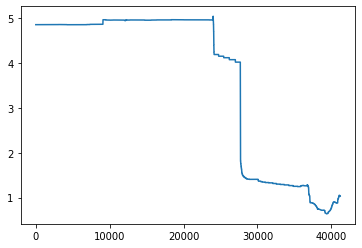

In [23]:
# LOOK AT THESE TIME SERIES VERSUS CUMULATIVE 'yes' or 'yes' % by year?

plt.plot(bank_data['euribor3m']);

### Clean the data:

In [24]:
# keep 'unknown' in as a category for now

### Feature engineering and pre-processing:

In [25]:
# create an 'economic conditions' attribute (1 for good, 0 for bad)
# data_processed.rename(columns={'emp.var.rate' : 'economic_conditions'}, inplace=True)
# data_processed.loc[data_processed['economic_conditions'] > 0, 'economic_conditions'] = 'Good'
# data_processed.loc[data_processed['economic_conditions'] != 'Good', 'economic_conditions'] = 'Bad'

In [105]:
attribs_remove = ['duration', 'marital', 'housing', 'loan', 'day_of_week', 'y']
cat_attribs_final = [attrib for attrib in categorical_attribs if attrib not in attribs_remove]
num_attribs_final = [attrib for attrib in numerical_attribs if attrib not in attribs_remove]

def preprocess(data):
    data_processed = data.copy()
    data_processed.drop(columns = attribs_remove, inplace=True)
    data_processed.loc[data_processed['pdays'] == 999, 'pdays'] = 0
    return data_processed

train_set_processed = preprocess(train_set)
test_set_processed = preprocess(test_set)

In [106]:
# from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

transformer = ColumnTransformer([
    ('numerical', StandardScaler(), num_attribs_final),
    ('categorical', OneHotEncoder(), cat_attribs_final)
])

X_train = transformer.fit_transform(train_set_processed)
X_test = transformer.transform(test_set_processed)

ordinal_enc = OrdinalEncoder()
y_train = ordinal_enc.fit_transform(np.array(train_set['y']).reshape(-1,1)).ravel()
y_test = ordinal_enc.fit_transform(np.array(test_set['y']).reshape(-1,1)).ravel()

### Modelling:

Try to identify a promising model:

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC

models = {"Logistic Reg" : LogisticRegression(multi_class='ovr', max_iter=200),
          "Linear SVM" : LinearSVC()}#,
#           "Non-Linear SVM" : SVC(),
#           "Random Forest" : RandomForestClassifier(random_state=0)}

Per the below results:
11.2% of clients in the training set. Hence, an 'always no' classifier would achieve ~89% accuracy but 0% recall. The 4 classifiers perform similarly across the metrics except the random forest which returns a lower recall and higher precision than the other classifiers.

In [104]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_validate
from IPython.display import display

def run_models(models_dict, X_train, y_train):
    results = []
    column_titles = []
    scorers = {'Accuracy': 'accuracy', 'Precision' : 'precision', 'Recall' : 'recall'}
    for model_name, model in models_dict.items():
        column_titles.append(model_name)
        scores = cross_validate(model, X_train, y_train, cv=5, scoring=scorers)
        results.append([np.mean(scores['test_Accuracy']), np.mean(scores['test_Precision']),
                        np.mean(scores['test_Recall'])])
    display(pd.DataFrame(np.round(np.transpose(results), 3), columns=column_titles, 
                         index=['Accuracy', 'Precision', 'Recall']))

run_models(models, X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

,Logistic Reg,Linear SVM
Accuracy,0.900,0.899
Precision,0.674,0.678
Recall,0.218,0.207


In [53]:
# from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
# from IPython.display import display

# def run_models(models_dict, X_train, y_train, X_test, y_test):
#     results = []
#     column_titles = []
#     for model_name, model in models_dict.items():
#         column_titles.append(model_name)
#         model.fit(X_train, y_train)
#         y_train_predict = model.predict(X_train)
#         y_test_predict = model.predict(X_test)

#         results.append([accuracy_score(y_train, y_train_predict), precision_score(y_train, y_train_predict),
#                         recall_score(y_train, y_train_predict), accuracy_score(y_test, y_test_predict), 
#                         precision_score(y_test, y_test_predict), recall_score(y_test, y_test_predict)])
   
#     idx = pd.MultiIndex.from_tuples([('Training', 'Accuracy'), ('Training', 'Precision'),
#                                      ('Training', 'Recall'), ('Test', 'Accuracy'), 
#                                      ('Test', 'Precision'), ('Test', 'Recall')])
#     display(pd.DataFrame(np.round(np.transpose(results), 3), columns=column_titles, index=idx))

# run_models(models, X_train, y_train, X_test, y_test)

In [94]:
from sklearn.model_selection import cross_val_predict

scores = {}
for model_name, model in models.items():
    if model_name in ['Logistic Reg', 'Random Forest']:
        y_train_scores = cross_val_predict(model, X_train, y_train, cv=5, method="predict_proba")[:,1]
    else:
        y_train_scores = cross_val_predict(model, X_train, y_train, cv=5, method="decision_function")
    scores[model_name] = y_train_scores

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

AUC:
Logistic Reg: 0.79
Linear SVM: 0.79


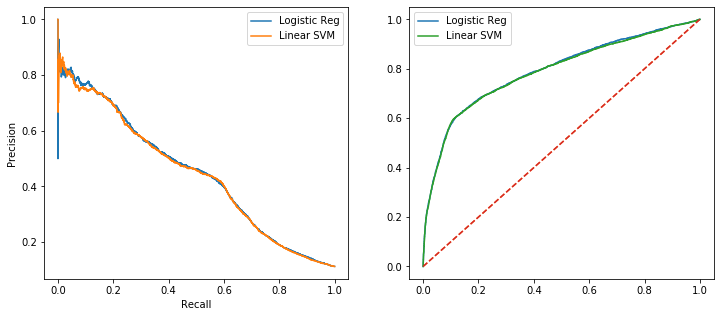

In [95]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve

fig, ax = plt.subplots(1, 2, figsize=(12,5));
fig.subplots_adjust(wspace=0.2);

print("AUC:")
for model_name, model in models.items():       
    precisions, recalls, thresholds = precision_recall_curve(y_train, scores[model_name])
    ax[0].plot(recalls, precisions, label=model_name);
    ax[0].set(xlabel='Recall', ylabel='Precision');
    
    fpr, tpr, thresholds = roc_curve(y_train, scores[model_name])
    ax[1].plot(fpr, tpr, label=model_name);
    ax[1].plot([0,1], [0,1], '--');
    print(model_name + ":", round(roc_auc_score(y_train, scores[model_name]), 2))

ax[0].legend();
ax[1].legend();

In [63]:
precisions, recalls, thresholds = precision_recall_curve(y_train, scores['Random Forest'])
plt.plot(thresholds, recalls[:-1]);
plt.plot(thresholds, precisions[:-1]);

KeyError: 'Random Forest'